# Pandas DataFrame for storing tweet feed (total 12 points)

Creating the following date frame for storing tweets:

- **climate_feed_df** DataFrame for storing tweets
- **retweeted_status_df** for storing original tweets

In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import requests
from bs4 import BeautifulSoup as bsp

The pickle files retweeted_status_df.pkl and climate_feed.pkl should be in the same folder as this notebook.
If needed, they can also be downloaded by uncommenting the commands below.

In [6]:
#!wget https://github.com/psnegi/data_science_tools1/raw/master/hws/retweeted_status_df.pkl

In [7]:
#!wget https://github.com/psnegi/data_science_tools1/raw/master/hws/climate_feed.pkl

<font color= "red">Click on these links if the above downloads fail. </font>


https://github.com/psnegi/data_science_tools1/raw/master/hws/climate_feed.pkl

https://github.com/psnegi/data_science_tools1/raw/master/hws/retweeted_status_df.pkl

Keep these pickle files in the same directory as the notebook

In [141]:
retweeted_status_df = pd.read_pickle("./retweeted_status_df.pkl")

In [142]:
retweeted_status_df

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,scopes,source,text,truncated,user
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,None,Sat Feb 09 20:27:45 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': [{'indices': [117, 140], 'url': 'https://t.co/G0PqMIEUMV', 'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/status/1094332044052549633'}], 'symbols': []}",NaN,99.0,False,None,1.094332e+18,1094332044052549633,...,NaN,NaN,NaN,81.0,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>","The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember,… https://t.co/G0PqMIEUMV",True,"{'default_profile': False, 'protected': False, 'follow_request_sent': None, 'is_translator': False, 'profile_use_background_image': False, 'name': 'Rob Oakeshott', 'profile_background_tile': False, 'friends_count': 4161, 'following': None, 'id_str': '16777464', 'profile_link_color': 'ABB8C2', 'listed_count': 636, 'translator_type': 'none', 'utc_offset': None, 'id': 16777464, 'is_translation_enabled': False, 'description': 'Independent candidate for Cowper. Lismore born Port Macquarie resident. Former state and federal MP. Views own. #Oakey4Cowper', '..."
2,NaN,None,Sat Feb 09 23:56:18 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': [{'indices': [88, 111], 'url': 'https://t.co/HWjCJGhQIx', 'display_url': 'twitter.com/LeoDiCaprio/st…', 'expanded_url': 'https://twitter.com/LeoDiCaprio/status/1093998640392220673'}], 'symbols': []}",NaN,6.0,False,None,1.094385e+18,1094384528267902977,...,"{'favorited': False, 'favorite_count': 2642, 'in_reply_to_screen_name': None, 'retweet_count': 734, 'possibly_sensitive': False, 'metadata': {'result_type': 'recent', 'iso_language_code': 'en'}, 'id_str': '1093998640392220673', 'entities': {'hashtags': [], 'user_mentions': [{'id_str': '958196173', 'name': ""Unist'ot'en Camp"", 'screen_name': 'UnistotenCamp', 'indices': [47, 61], 'id': 958196173}], 'urls': [{'indices': [116, 139], 'url': 'https://t.co/qeZKIWWIur', 'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/s...",1.093999e+18,1093998640392220673,5.0,False,NaN,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",This is the same idiot who thought\nThe southern Alberta chinook was climate change lol. https://t.co/HWjCJGhQIx,False,"{'default_profile': False, 'protected': False, 'follow_request_sent': None, 'is_translator': False, 'profile_use_background_image': False, 'name': 'Suze Michelini', 'profile_background_tile': False, 'friends_count': 15565, 'following': None, 'id_str': '850130990706151428', 'profile_link_color': '1B95E0', 'listed_count': 62, 'translator_type': 'none', 'utc_offset': None, 'id': 850130990706151428, 'is_translation_enabled': False, 'description': 'AI Tech inventor for autistic children,brain injuries Snowboarder,lesbian, Libertarian, Proud Aspie,PhD in A..."
3,NaN,None,Sat Feb 09 23:34:27 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': [{'indices': [117, 140], 'url': 'https://t.co/2asxrk5Fqd', 'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/status/1094379028608438272'}], 'symbols': []}",NaN,190.0,False,None,1.094379e+18,1094379028608438272,...,"{'favorited': False, 'favorite_count': 220, 'in_reply_to_screen_name': None, 'retweet_count': 118, 'metadata': {'result_type': 'recent', 'iso_language_code': 'en'}, 'id_str': '1093931686998487040', 'entities': {'hashtags': [], 'user_mentions': [], 'urls': [{'indices': [117, 140], 'url': 'https://t.co/zQRo40WzF8', 'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/status/1093931686998487040'}], 'symbols': []}, 'place': None, 'coordina

In [93]:
#climate_feed_df.to_pickle("./climate_feed.pkl")
climate_feed_df = pd.read_pickle("./climate_feed.pkl")
climate_feed_df

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user_id
0,None,None,Sun Feb 10 00:17:31 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': '48117116', 'name': 'Steve King', 'screen_name': 'SteveKingIA', 'indices': [1, 13], 'id': 48117116}], 'urls': [{'indices': [117, 140], 'url': 'https://t.co/J1CcrQZkB2', 'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/status/1094389867499405313'}], 'symbols': []}",NaN,0,False,None,1094389867499405313,1094389867499405313,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",.@SteveKingIA says he's unsure about the science of climate change. But you don’t need to be a scientist to take ac… https://t.co/J1CcrQZkB2,True,31476142
1,None,None,Sun Feb 10 00:17:30 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': '16777464', 'name': 'Rob Oakeshott', 'screen_name': 'RobOakeshott1', 'indices': [3, 17], 'id': 16777464}], 'urls': [], 'symbols': []}",NaN,0,False,None,1094389862193455105,1094389862193455105,...,NaN,NaN,NaN,81,False,1.094332e+18,"<a href=""http://tapbots.com/tweetbot"" rel=""nofollow"">Tweetbot for iΟS</a>","RT @RobOakeshott1: The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember, the…",False,996782298
2,None,None,Sun Feb 10 00:17:26 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': '850130990706151428', 'name': 'Suze Michelini', 'screen_name': 'emilia_suze', 'indices': [3, 15], 'id': 850130990706151428}], 'urls': [{'indices': [105, 128], 'url': 'https://t.co/HWjCJGhQIx', 'display_url': 'twitter.com/LeoDiCaprio/st…', 'expanded_url': 'https://twitter.com/LeoDiCaprio/status/1093998640392220673'}], 'symbols': []}",NaN,0,False,None,1094389844078485506,1094389844078485506,...,NaN,1093998640392220673,1093998640392220673,5,False,1.094385e+18,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",RT @emilia_suze: This is the same idiot who thought\nThe southern Alberta chinook was climate change lol. https://t.co/HWjCJGhQIx,False,45333453
3,None,None,Sun Feb 10 00:17:24 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': '753005970318626816', 'name': 'Chad Vigorous', 'screen_name': 'PrettyBadLefty', 'indices': [3, 18], 'id': 753005970318626816}], 'urls': [], 'symbols': []}",NaN,0,False,None,1094389837522599936,1094389837522599936,...,NaN,1093931686998487040,1093931686998487040,31,False,1.094379e+18,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>","RT @PrettyBadLefty: Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MSNBC.…",False,1020067726532829185
4,None,None,Sun Feb 10 00:17:23 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': '1634248890', 'name': 'Ken Klippenstein', 'screen_name': 'kenklippenstein', 'indices': [3, 19], 'id': 1634248890}], 'urls': [], 'symbols': []}",NaN,0,False,None,1094389831419994112,1094389831419994112,...,NaN,NaN,NaN,599,False,1.094312e+18,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",RT @kenklippenstein: Unmitigated climate change would literally destroy civilization but doing something about it might increase the defici…,False,19889325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,None,None,Sat Feb 09 20:57:54 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': '1073261955216039937', 'name': 'fromhello2hello', 'screen_name': 'fromhello2hello', 'indices': [3, 19], 'id': 1073261955216039937}], 'urls': [{'indices': [78, 101], 'url': 'https://t.co/P1X5jfuUQC', 'display_url': 'treehugger.com/climate-change…', 'expanded_url': 'https://www.treehugger.com/climate-change/72-americans-are-very-worried-about-climate-change

Here are dtypes for climate_feed_df. We'll work with only
- entities to extract hashtags
- retweeted_status in case we need to extract original full tweet
- truncated
- text: tweet text
- created_at
- user_id

Some of them have wrong datatypes.

In [143]:
climate_feed_df.dtypes

created_at               datetime64[ns]
entities                         object
retweeted_status                float64
truncated                          bool
user_id                           int64
text                             object
hashtags                         object
user_mentions                    object
original_tweet_text              object
original_tweet_id_str            object
final_tweet_text                 object
emoji                            object
dtype: object

# Q1 (points .5) Replace None with nan in climate_feed_df. Also display some random rows.


In [144]:
# write code here
climate_feed_df.replace("None", "NaN")

,created_at,entities,retweeted_status,truncated,user_id,text,hashtags,user_mentions,original_tweet_text,original_tweet_id_str,final_tweet_text,emoji
0,2019-02-10 00:17:31,"{'hashtags': [], 'user_mentions': [{'id_str': '48117116', 'name': 'Steve King', 'screen_name': 'SteveKingIA', 'indices': [1, 13], 'id': 48117116}], 'urls': [{'indices': [117, 140], 'url': 'https://t.co/J1CcrQZkB2', 'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/status/1094389867499405313'}], 'symbols': []}",NaN,True,31476142,. says he's unsure about the science of climate change. But you don’t need to be a scientist to take ac…,None,Steve King,None,None,. says he's unsure about the science of climate change. But you don’t need to be a scientist to take ac…,[]
1,2019-02-10 00:17:30,"{'hashtags': [], 'user_mentions': [{'id_str': '16777464', 'name': 'Rob Oakeshott', 'screen_name': 'RobOakeshott1', 'indices': [3, 17], 'id': 16777464}], 'urls': [], 'symbols': []}",1.094332e+18,True,996782298,"The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember, the…",None,Rob Oakeshott,"The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember,… https://t.co/G0PqMIEUMV",1094332044052549633,"The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember, the…",[]
2,2019-02-10 00:17:26,"{'hashtags': [], 'user_mentions': [{'id_str': '850130990706151428', 'name': 'Suze Michelini', 'screen_name': 'emilia_suze', 'indices': [3, 15], 'id': 850130990706151428}], 'urls': [{'indices': [105, 128], 'url': 'https://t.co/HWjCJGhQIx', 'display_url': 'twitter.com/LeoDiCaprio/st…', 'expanded_url': 'https://twitter.com/LeoDiCaprio/status/1093998640392220673'}], 'symbols': []}",1.094385e+18,True,45333453,This is the same idiot who thought\nThe southern Alberta chinook was climate change lol.,None,Suze Michelini,This is the same idiot who thought\nThe southern Alberta chinook was climate change lol. https://t.co/HWjCJGhQIx,1094384528267902977,This is the same idiot who thought\nThe southern Alberta chinook was climate change lol.,[]
3,2019-02-10 00:17:24,"{'hashtags': [], 'user_mentions': [{'id_str': '753005970318626816', 'name': 'Chad Vigorous', 'screen_name': 'PrettyBadLefty', 'indices': [3, 18], 'id': 753005970318626816}], 'urls': [], 'symbols': []}",1.094379e+18,True,1020067726532829185,"Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MSNBC.…",None,Chad Vigorous,"Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MS… https://t.co/2asxrk5Fqd",1094379028608438272,"Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MSNBC.…",[]
4,2019-02-10 00:17:23,"{'hashtags': [], 'user_mentions': [{'id_str': '1634248890', 'name': 'Ken Klippenstein', 'screen_name': 'kenklippenstein', 'indices': [3, 19], 'id': 1634248890}], 'urls': [], 'symbols': []}",1.094312e+18,True,19889325,Unmitigated climate change would literally destroy civilization but doing something about it might increase the defici…,None,Ken Klippenstein,Unmitigated climate change would literally destroy civilization but doing something about it might increase the def… https://t.co/1J7lLUkYyY,1094311957669265408,Unmitigated climate change would literally destroy civilization but doing something about it might increase the defici…,[]
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,2019-02-09 20:57:54,"{'hashtags': [], 'user_mentions': [{'id_str': '1073261955216039937', 'name': 'fromhello2hello', 'screen_name': 'fromhello2hello', 'indices': [3, 19], 'id': 1073261955216039937}], 'urls': [{'indices': [78, 101], 'url': 'https://t.co/P1X5jfuUQC', 'display_url': 'treehugger.com/climate-change…', 'expanded_url': 'https://www.treehugger.com/climate-change/7

Working with only selected attributes.

In [145]:
climate_feed_df = climate_feed_df[['created_at', 'entities','retweeted_status', 'truncated', 'user_id', 'text' ]].copy()

In [146]:
climate_feed_df.sample(10)

,created_at,entities,retweeted_status,truncated,user_id,text
3588,2019-02-09 23:08:02,"{'hashtags': [], 'user_mentions': [{'id_str': '71627462', 'name': 'Jonah Goldberg', 'screen_name': 'JonahNRO', 'indices': [0, 9], 'id': 71627462}], 'urls': [{'indices': [117, 140], 'url': 'https://t.co/rqyyf88en5', 'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/status/1094372380573609984'}], 'symbols': []}",NaN,True,848414456661110784,"You're an editor at a magazine that routinely publishes climate change denial by fossil fuel lobbyists, c…"
3039,2019-02-09 23:20:21,"{'hashtags': [], 'user_mentions': [{'id_str': '902682750', 'name': 'James 🕊 #HandsOffVenezuela', 'screen_name': 'jamesforpeace', 'indices': [0, 14], 'id': 902682750}], 'urls': [], 'symbols': []}",NaN,True,815284156041043968,Let me channel my inner Republican:\nThat just proves that climate change is a communist plot. End of discussion.
7686,2019-02-09 21:42:59,"{'hashtags': [], 'user_mentions': [{'id_str': '432895323', 'name': 'Lindsey Graham', 'screen_name': 'LindseyGrahamSC', 'indices': [3, 19], 'id': 432895323}], 'urls': [], 'symbols': []}",1.093907e+18,True,2365600222,Let’s vote on the Green New Deal!\n \nAmericans deserve to see what kind of solutions far-left Democrats are offering to…
7311,2019-02-09 21:49:52,"{'hashtags': [], 'user_mentions': [{'id_str': '29442313', 'name': 'Bernie Sanders', 'screen_name': 'SenSanders', 'indices': [3, 14], 'id': 29442313}], 'urls': [], 'symbols': []}",1.094303e+18,True,985621531,President Trump believes we should listen to fossil fuel executives and ignore climate change. \n\nI believe we should listen…
2292,2019-02-09 23:34:06,"{'hashtags': [], 'user_mentions': [{'id_str': '722994185171816448', 'name': 'Raging Gay Conservative', 'screen_name': 'RagingGayCons', 'indices': [3, 17], 'id': 722994185171816448}], 'urls': [], 'symbols': []}",1.093617e+18,True,446263225,Nancy Pelosi is excluding Alexandria Ocasio-Cortez from the new climate change committee. \n\nThe moment that you're so nu…
4281,2019-02-09 22:53:26,"{'hashtags': [], 'user_mentions': [{'id_str': '1350410232', 'name': 'Kendra ⚔️', 'screen_name': 'kendrawcandraw', 'indices': [3, 18], 'id': 1350410232}], 'urls': [], 'symbols': []}",1.093989e+18,True,75256717,People old enough to not be alive to suffer the consequences of climate change shouldn't be allowed to deny movements a…
2897,2019-02-09 23:22:52,"{'hashtags': [], 'user_mentions': [{'id_str': '29442313', 'name': 'Bernie Sanders', 'screen_name': 'SenSanders', 'indices': [3, 14], 'id': 29442313}], 'urls': [], 'symbols': []}",1.094303e+18,True,900536442920808456,President Trump believes we should listen to fossil fuel executives and ignore climate change. \n\nI believe we should listen…
9635,2019-02-09 21:04:38,"{'hashtags': [], 'user_mentions': [{'id_str': '186162744', 'name': 'Watershed Watch', 'screen_name': 'WatershedWatch_', 'indices': [0, 16], 'id': 186162744}], 'urls': [{'indices': [117, 140], 'url': 'https://t.co/nqTeuZqpb7', 'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/status/1094341327246880769'}], 'symbols': []}",NaN,True,932885174,Killing and eating wild salmon is clearly the greatest threat to wild salmon.\n\nNot environmental c…
8195,2019-02-09 21:32:14,"{'hashtags': [], 'user_mentions': [{'id_str': '37557953', 'name': 'Mike Rosenberg', 'screen_name': 'ByRosenberg', 'indices': [3, 15], 'id': 37557953}], 'urls': [], 'symbols': []}",1.093946e+18,True,20915700,"God bless the climate reporters who painstainkingly write explainers on why winter still exists despite climate change\n\n""W…"
9627,2019-02-09 21:04:48,"{'hashtags': [], 'user_mentions': [{'id_str': '754663934901256192', 'name': 'Alma', 'screen_name': 'Alma00011', 'indices': [0, 10], 'id': 754663934901256192}, {'id_str': '14798094', 'name': 'Gerrit Hiemstra 🐰', 'screen_name': 'GerritHiemstra', 'indices': [11, 26], 'id': 14798094}, {'id_str': '15200788', 'name': 'Maarten Keule

# Q2 (points .5 =.25+.25) convert
- created_at to date time type
- truncated to bool type.


In [147]:
climate_feed_df['created_at'] = pd.to_datetime(climate_feed_df['created_at'])
climate_feed_df["truncated"] = np.where(climate_feed_df["truncated"] == "True", True, False)

Checking datatype again

In [148]:
climate_feed_df.dtypes

created_at          datetime64[ns]
entities                    object
retweeted_status           float64
truncated                     bool
user_id                      int64
text                        object
dtype: object

# Q3(points .5) In climate_feed_df, calculate the number of NAN values in various columns

In [149]:
climate_feed_df.isna().sum().sum()


2690

We'll use **ast** module to parse string to python dictionary

# Q4(points 1=.5+.5) Using *ast* module  convert entities to python dictionary. This dictionary should contain hashtags and user_mentions
 - Create a column named hashtags. Values in this columns should be comma separated values of **text** attribute in **hashtags**  value.
 - Create a column named user_mentions. Values in this columns should be command separated values of **name** attribute in **user_mentions** values.

In [150]:
import ast

climate_feed_df["entities"] = climate_feed_df["entities"].apply(lambda x: ast.literal_eval(x))

In [151]:
hashes = [k['hashtags'] for k in climate_feed_df["entities"]]
mentions = [k['user_mentions'] for k in climate_feed_df["entities"]]

climate_feed_df['hashtags'] = hashes
climate_feed_df['user_mentions'] = mentions

In [152]:
for i in range(len(climate_feed_df)):
    hashValues = climate_feed_df.loc[i,'hashtags']
    if hashValues:
        climate_feed_df.at[i,'hashtags'] = ','.join(map(str, hashValues))
    else:
        climate_feed_df.at[i,'hashtags'] = None
        
    users = climate_feed_df.loc[i,'user_mentions']
    if users:
        names = []
        for k in users:
            name = k.get('name')
            names.append(name)
            climate_feed_df.at[i,'user_mentions'] = ','.join(map(str, names))
    else:
        climate_feed_df.at[i,'user_mentions'] = None
        
climate_feed_df.head(n=10)

,created_at,entities,retweeted_status,truncated,user_id,text,hashtags,user_mentions
0,2019-02-10 00:17:31,"{'hashtags': [], 'user_mentions': [{'id_str': '48117116', 'name': 'Steve King', 'screen_name': 'SteveKingIA', 'indices': [1, 13], 'id': 48117116}], 'urls': [{'indices': [117, 140], 'url': 'https://t.co/J1CcrQZkB2', 'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/status/1094389867499405313'}], 'symbols': []}",NaN,False,31476142,. says he's unsure about the science of climate change. But you don’t need to be a scientist to take ac…,None,Steve King
1,2019-02-10 00:17:30,"{'hashtags': [], 'user_mentions': [{'id_str': '16777464', 'name': 'Rob Oakeshott', 'screen_name': 'RobOakeshott1', 'indices': [3, 17], 'id': 16777464}], 'urls': [], 'symbols': []}",1.094332e+18,False,996782298,"The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember, the…",None,Rob Oakeshott
2,2019-02-10 00:17:26,"{'hashtags': [], 'user_mentions': [{'id_str': '850130990706151428', 'name': 'Suze Michelini', 'screen_name': 'emilia_suze', 'indices': [3, 15], 'id': 850130990706151428}], 'urls': [{'indices': [105, 128], 'url': 'https://t.co/HWjCJGhQIx', 'display_url': 'twitter.com/LeoDiCaprio/st…', 'expanded_url': 'https://twitter.com/LeoDiCaprio/status/1093998640392220673'}], 'symbols': []}",1.094385e+18,False,45333453,This is the same idiot who thought\nThe southern Alberta chinook was climate change lol.,None,Suze Michelini
3,2019-02-10 00:17:24,"{'hashtags': [], 'user_mentions': [{'id_str': '753005970318626816', 'name': 'Chad Vigorous', 'screen_name': 'PrettyBadLefty', 'indices': [3, 18], 'id': 753005970318626816}], 'urls': [], 'symbols': []}",1.094379e+18,False,1020067726532829185,"Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MSNBC.…",None,Chad Vigorous
4,2019-02-10 00:17:23,"{'hashtags': [], 'user_mentions': [{'id_str': '1634248890', 'name': 'Ken Klippenstein', 'screen_name': 'kenklippenstein', 'indices': [3, 19], 'id': 1634248890}], 'urls': [], 'symbols': []}",1.094312e+18,False,19889325,Unmitigated climate change would literally destroy civilization but doing something about it might increase the defici…,None,Ken Klippenstein
5,2019-02-10 00:17:21,"{'hashtags': [], 'user_mentions': [{'id_str': '321774180', 'name': '♻️🇺🇸 Christopher Zullo', 'screen_name': 'ChrisJZullo', 'indices': [3, 15], 'id': 321774180}, {'id_str': '25073877', 'name': 'Donald J. Trump', 'screen_name': 'realDonaldTrump', 'indices': [17, 33], 'id': 25073877}], 'urls': [], 'symbols': []}",1.094381e+18,False,16909343,Climate change denial has nothing to do with science or economics. It’s about profit for polluters. We li…,None,"♻️🇺🇸 Christopher Zullo,Donald J. Trump"
6,2019-02-10 00:17:21,"{'hashtags': [], 'user_mentions': [{'id_str': '499154896', 'name': 'Alexander Bruesewitz', 'screen_name': 'alexanderbruz', 'indices': [3, 17], 'id': 499154896}], 'urls': [], 'symbols': []}",1.094276e+18,False,908017796881240064,Happy Saturday! Friendly reminder that climate change is a hoax! \n\nHave a great day everyone!,None,Alexander Bruesewitz
7,2019-02-10 00:17:20,"{'hashtags': [], 'user_mentions': [{'id_str': '45702582', 'name': 'Chris Kantarjiev', 'screen_name': 'kantarjiev', 'indices': [0, 11], 'id': 45702582}, {'id_str': '15387948', 'name': 'Gennady Sheyner', 'screen_name': 'gsheyner', 'indices': [12, 21], 'id': 15387948}], 'urls': [{'indices': [117, 140], 'url': 'https://t.co/IgErZKxhqv', 'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/status/1094389819239686144'}], 'symbols': []}",NaN,False,1065520951150800896,"Yes, this downtown parking garage is a mess. PA City Council just adopted climate change as a…",None,"Chris Kantarjiev,Gennady Sheyner"
8,2019-02-10 00:17:19,"{'hashtags': [], 'user_mentions': [{'id_str': '237845487', 'name': 'George Takei', 'screen_name': 'GeorgeTakei', 'indices': 

# Cleaning tweets

Let's see some random tweets

In [153]:
tweet_length= 280
pd.set_option('max_colwidth', 2*tweet_length)
climate_feed_df['text'].sample(100)

4347            Climate change is an existential crisis. I’m proud to co-sponsor the #GreenNewDeal—affirming our commitment to develop a…
587       Hi everyone the literal plot of Game of Thrones is society paying the ultimate price as squabbling rich guys sabotage each oth…
3768         BOOM! \n\n“The controversial Rocky Hill coalmine in the Hunter Valley will not go ahead after a landmark ruling in the land…
8975                Nationals' court drama after mine ruling. It is interesting where the Nationals priority policy issues are. How muc… 
8141              Unmitigated climate change would literally destroy civilization but doing something about it might increase the defici…
                                                                      ...                                                                
825        President Trump believes we should listen to fossil fuel executives and ignore climate change. \n\nI believe we should listen…
505                               

**Example of tweet not truncated**

In [154]:
climate_feed_df['text'].loc[3929]

'Fighting climate change without nuclear is a fool’s errand. '

**Exampe of tweet truncated**

In [155]:
climate_feed_df['text'].loc[3928]

'  If only Abbott could fight as hard for the safety of our country from the impacts of climate change, as he is fighting f…'

Truncated tweet has three horizontal ellipses in it. One can check retweeted_status values and 
use it got the the original tweet text

In [156]:
climate_feed_df.retweeted_status.loc[3928]

1.0943594112863928e+18

In [157]:
retweeted_status_df[retweeted_status_df.id == climate_feed_df.retweeted_status.loc[3928]].text.iloc[0]

'If only Abbott could fight as hard for the safety of our country from the impacts of climate change, as he is fight… https://t.co/OJlsDeFoNA'

There is url above tweet. We can use **requests** to get the complete text.



# Q5(3.5 points, 1 for the use of requests and text extraction from right html element+.5+1+1 for the rest.) Perform following activities for creating a new original_tweet_text field in climate_feed_df. 

Option 1. This question frequently presents a challenge to students. If needed, please use the provided pickle file.
Just uncomment the following cell to import the dataframe.

Option 2. Use twitter API. For this you will need to look at hw 4 to set up the connection and use the "2/tweets/{id}" endpoint.

Either option will work. You will still need to do the cleaning portion of the question for either option you choose.

This is also the documentation link for the api call:
https://developer.twitter.com/en/docs/twitter-api/tweets/lookup/api-reference/get-tweets-id

- If  climate_feed_df has a valid retweeted_status(**it is an id of the record in retweeted_status_df** ), then use retweeted_status_df to get the original text(**retweeted_status_df.text**) otherwise use None(**Ignore the value of climate_feed_df.truncated field for this activity.**).
    + If retweeted_status_df.text has a URL(like https://t.co/RKyppIS5c9 ), use it to get complete text from right html element. 
    
    *If you have a way to figure out that one is not supposed to web scrap this URL don't scrap it.*
    
- Create a new field named **original_tweet_text** in climate_feed_df to store the text extracted from URL(use None if requests to URL fails or any other issues.). Use retweeted_status_df.text if there was no 
 URL.
- From  newly original_tweet_text field remove
    - one or more \n with .(dot)
    - any url(http, https)
    - @user, @user:

*Note that as you will be making a lot of requests call(I/O bound calls), this portion of code can be slow. you may want to test your code on a small number of records first.*

In [158]:
import pickle
with open('q5_dataframe.pkl', 'rb') as f:
    climate_feed_df = pickle.loads(f.read())
climate_feed_df.head()

,created_at,entities,retweeted_status,truncated,user_id,text,hashtags,user_mentions,original_tweet_text,original_tweet_id_str
0,2019-02-10 00:17:31,"{'hashtags': [], 'user_mentions': [{'id_str': '48117116', 'name': 'Steve King', 'screen_name': 'SteveKingIA', 'indices': [1, 13], 'id': 48117116}], 'urls': [{'indices': [117, 140], 'url': 'https://t.co/J1CcrQZkB2', 'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/status/1094389867499405313'}], 'symbols': []}",NaN,True,31476142,.@SteveKingIA says he's unsure about the science of climate change. But you don’t need to be a scientist to take ac… https://t.co/J1CcrQZkB2,None,Steve King,None,None
1,2019-02-10 00:17:30,"{'hashtags': [], 'user_mentions': [{'id_str': '16777464', 'name': 'Rob Oakeshott', 'screen_name': 'RobOakeshott1', 'indices': [3, 17], 'id': 16777464}], 'urls': [], 'symbols': []}",1.094332e+18,True,996782298,"RT @RobOakeshott1: The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember, the…",None,Rob Oakeshott,"The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember,… https://t.co/G0PqMIEUMV",1094332044052549633
2,2019-02-10 00:17:26,"{'hashtags': [], 'user_mentions': [{'id_str': '850130990706151428', 'name': 'Suze Michelini', 'screen_name': 'emilia_suze', 'indices': [3, 15], 'id': 850130990706151428}], 'urls': [{'indices': [105, 128], 'url': 'https://t.co/HWjCJGhQIx', 'display_url': 'twitter.com/LeoDiCaprio/st…', 'expanded_url': 'https://twitter.com/LeoDiCaprio/status/1093998640392220673'}], 'symbols': []}",1.094385e+18,True,45333453,RT @emilia_suze: This is the same idiot who thought\nThe southern Alberta chinook was climate change lol. https://t.co/HWjCJGhQIx,None,Suze Michelini,This is the same idiot who thought\nThe southern Alberta chinook was climate change lol. https://t.co/HWjCJGhQIx,1094384528267902977
3,2019-02-10 00:17:24,"{'hashtags': [], 'user_mentions': [{'id_str': '753005970318626816', 'name': 'Chad Vigorous', 'screen_name': 'PrettyBadLefty', 'indices': [3, 18], 'id': 753005970318626816}], 'urls': [], 'symbols': []}",1.094379e+18,True,1020067726532829185,"RT @PrettyBadLefty: Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MSNBC.…",None,Chad Vigorous,"Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MS… https://t.co/2asxrk5Fqd",1094379028608438272
4,2019-02-10 00:17:23,"{'hashtags': [], 'user_mentions': [{'id_str': '1634248890', 'name': 'Ken Klippenstein', 'screen_name': 'kenklippenstein', 'indices': [3, 19], 'id': 1634248890}], 'urls': [], 'symbols': []}",1.094312e+18,True,19889325,RT @kenklippenstein: Unmitigated climate change would literally destroy civilization but doing something about it might increase the defici…,None,Ken Klippenstein,Unmitigated climate change would literally destroy civilization but doing something about it might increase the def… https://t.co/1J7lLUkYyY,1094311957669265408


In [159]:
import re

for i in range(len(climate_feed_df)):
    text = climate_feed_df['original_tweet_text'][i]
    if text:
        text = text.replace('\n',".")
        text = text.replace('\t', "")
        a = re.sub(r'http\S+|RT|@\S+', '', text)
        climate_feed_df.at[i, 'original_tweet_text'] = a
    else:
        climate_feed_df.at[i, 'original_tweet_text'] = None

climate_feed_df

,created_at,entities,retweeted_status,truncated,user_id,text,hashtags,user_mentions,original_tweet_text,original_tweet_id_str
0,2019-02-10 00:17:31,"{'hashtags': [], 'user_mentions': [{'id_str': '48117116', 'name': 'Steve King', 'screen_name': 'SteveKingIA', 'indices': [1, 13], 'id': 48117116}], 'urls': [{'indices': [117, 140], 'url': 'https://t.co/J1CcrQZkB2', 'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/status/1094389867499405313'}], 'symbols': []}",NaN,True,31476142,.@SteveKingIA says he's unsure about the science of climate change. But you don’t need to be a scientist to take ac… https://t.co/J1CcrQZkB2,None,Steve King,None,None
1,2019-02-10 00:17:30,"{'hashtags': [], 'user_mentions': [{'id_str': '16777464', 'name': 'Rob Oakeshott', 'screen_name': 'RobOakeshott1', 'indices': [3, 17], 'id': 16777464}], 'urls': [], 'symbols': []}",1.094332e+18,True,996782298,"RT @RobOakeshott1: The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember, the…",None,Rob Oakeshott,"The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember,…",1094332044052549633
2,2019-02-10 00:17:26,"{'hashtags': [], 'user_mentions': [{'id_str': '850130990706151428', 'name': 'Suze Michelini', 'screen_name': 'emilia_suze', 'indices': [3, 15], 'id': 850130990706151428}], 'urls': [{'indices': [105, 128], 'url': 'https://t.co/HWjCJGhQIx', 'display_url': 'twitter.com/LeoDiCaprio/st…', 'expanded_url': 'https://twitter.com/LeoDiCaprio/status/1093998640392220673'}], 'symbols': []}",1.094385e+18,True,45333453,RT @emilia_suze: This is the same idiot who thought\nThe southern Alberta chinook was climate change lol. https://t.co/HWjCJGhQIx,None,Suze Michelini,This is the same idiot who thought.The southern Alberta chinook was climate change lol.,1094384528267902977
3,2019-02-10 00:17:24,"{'hashtags': [], 'user_mentions': [{'id_str': '753005970318626816', 'name': 'Chad Vigorous', 'screen_name': 'PrettyBadLefty', 'indices': [3, 18], 'id': 753005970318626816}], 'urls': [], 'symbols': []}",1.094379e+18,True,1020067726532829185,"RT @PrettyBadLefty: Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MSNBC.…",None,Chad Vigorous,"Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MS…",1094379028608438272
4,2019-02-10 00:17:23,"{'hashtags': [], 'user_mentions': [{'id_str': '1634248890', 'name': 'Ken Klippenstein', 'screen_name': 'kenklippenstein', 'indices': [3, 19], 'id': 1634248890}], 'urls': [], 'symbols': []}",1.094312e+18,True,19889325,RT @kenklippenstein: Unmitigated climate change would literally destroy civilization but doing something about it might increase the defici…,None,Ken Klippenstein,Unmitigated climate change would literally destroy civilization but doing something about it might increase the def…,1094311957669265408
...,...,...,...,...,...,...,...,...,...,...
9994,2019-02-09 20:57:54,"{'hashtags': [], 'user_mentions': [{'id_str': '1073261955216039937', 'name': 'fromhello2hello', 'screen_name': 'fromhello2hello', 'indices': [3, 19], 'id': 1073261955216039937}], 'urls': [{'indices': [78, 101], 'url': 'https://t.co/P1X5jfuUQC', 'display_url': 'treehugger.com/climate-change…', 'expanded_url': 'https://www.treehugger.com/climate-change/72-americans-are-very-worried-about-climate-change.html'}], 'symbols': []}",1.094339e+18,True,888112320097918976,RT @fromhello2hello: 72% of Americans are 'very worried' about climate change https://t.co/P1X5jfuUQC,None,fromhello2hello,72% of Americans are 'very worried' about climate change,1094339317324017665
9995,2019-02-09 20:57:54,"{'hashtags': [], 'user_mentions': [{'id_str': '1082006962995429383', 'name': 'stuntdaddy_42', 'screen_name': 'stuntdaddy_42', 'indices': [3, 17], 'id': 1082006962995429383}, {'id_str': '2497547378', 'name': 'Justice Faurall', 's

# Q 6(point 1= .5+.5) Remove all the references  of RT and  @user: or @user, and url in climate_feed_df text attribute.

In [160]:
for i in range(len(climate_feed_df)):
    text = climate_feed_df['text'][i]
    a = re.sub(r'http\S+|RT|@\S+', '', text)
    climate_feed_df.at[i, 'text'] = a

climate_feed_df

,created_at,entities,retweeted_status,truncated,user_id,text,hashtags,user_mentions,original_tweet_text,original_tweet_id_str
0,2019-02-10 00:17:31,"{'hashtags': [], 'user_mentions': [{'id_str': '48117116', 'name': 'Steve King', 'screen_name': 'SteveKingIA', 'indices': [1, 13], 'id': 48117116}], 'urls': [{'indices': [117, 140], 'url': 'https://t.co/J1CcrQZkB2', 'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/status/1094389867499405313'}], 'symbols': []}",NaN,True,31476142,. says he's unsure about the science of climate change. But you don’t need to be a scientist to take ac…,None,Steve King,None,None
1,2019-02-10 00:17:30,"{'hashtags': [], 'user_mentions': [{'id_str': '16777464', 'name': 'Rob Oakeshott', 'screen_name': 'RobOakeshott1', 'indices': [3, 17], 'id': 16777464}], 'urls': [], 'symbols': []}",1.094332e+18,True,996782298,"The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember, the…",None,Rob Oakeshott,"The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember,…",1094332044052549633
2,2019-02-10 00:17:26,"{'hashtags': [], 'user_mentions': [{'id_str': '850130990706151428', 'name': 'Suze Michelini', 'screen_name': 'emilia_suze', 'indices': [3, 15], 'id': 850130990706151428}], 'urls': [{'indices': [105, 128], 'url': 'https://t.co/HWjCJGhQIx', 'display_url': 'twitter.com/LeoDiCaprio/st…', 'expanded_url': 'https://twitter.com/LeoDiCaprio/status/1093998640392220673'}], 'symbols': []}",1.094385e+18,True,45333453,This is the same idiot who thought\nThe southern Alberta chinook was climate change lol.,None,Suze Michelini,This is the same idiot who thought.The southern Alberta chinook was climate change lol.,1094384528267902977
3,2019-02-10 00:17:24,"{'hashtags': [], 'user_mentions': [{'id_str': '753005970318626816', 'name': 'Chad Vigorous', 'screen_name': 'PrettyBadLefty', 'indices': [3, 18], 'id': 753005970318626816}], 'urls': [], 'symbols': []}",1.094379e+18,True,1020067726532829185,"Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MSNBC.…",None,Chad Vigorous,"Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MS…",1094379028608438272
4,2019-02-10 00:17:23,"{'hashtags': [], 'user_mentions': [{'id_str': '1634248890', 'name': 'Ken Klippenstein', 'screen_name': 'kenklippenstein', 'indices': [3, 19], 'id': 1634248890}], 'urls': [], 'symbols': []}",1.094312e+18,True,19889325,Unmitigated climate change would literally destroy civilization but doing something about it might increase the defici…,None,Ken Klippenstein,Unmitigated climate change would literally destroy civilization but doing something about it might increase the def…,1094311957669265408
...,...,...,...,...,...,...,...,...,...,...
9994,2019-02-09 20:57:54,"{'hashtags': [], 'user_mentions': [{'id_str': '1073261955216039937', 'name': 'fromhello2hello', 'screen_name': 'fromhello2hello', 'indices': [3, 19], 'id': 1073261955216039937}], 'urls': [{'indices': [78, 101], 'url': 'https://t.co/P1X5jfuUQC', 'display_url': 'treehugger.com/climate-change…', 'expanded_url': 'https://www.treehugger.com/climate-change/72-americans-are-very-worried-about-climate-change.html'}], 'symbols': []}",1.094339e+18,True,888112320097918976,72% of Americans are 'very worried' about climate change,None,fromhello2hello,72% of Americans are 'very worried' about climate change,1094339317324017665
9995,2019-02-09 20:57:54,"{'hashtags': [], 'user_mentions': [{'id_str': '1082006962995429383', 'name': 'stuntdaddy_42', 'screen_name': 'stuntdaddy_42', 'indices': [3, 17], 'id': 1082006962995429383}, {'id_str': '2497547378', 'name': 'Justice Faurall', 'screen_name': 'JFaurall', 'indices': [19, 28], 'id': 2497547378}, {'id_str': '3073664870', 'name': 'Michael Shelton', 'screen_name': 'MgBenchjeweler', 'indices': [29, 44], 'id': 30736

# Q 7 (2 point) Create a new attribute in climate_feed_df named *final_tweet_text*. If *original_tweet_text* is None  then use climate_feed_df.text otherwise use *original_text_tweet* if initial words matched with *climate_feed_df.text* words. If words don't match use climate_feed_df.text

Note that some time after fetching text from a url based on retweeted_status_df.text, we may get different text. We can fix it but for this homework we are ignoring it.

In [161]:
climate_feed_df.insert(10, "final_tweet_text", None)

for i in range(len(climate_feed_df)):
    if climate_feed_df['original_tweet_text'][i] == None:
        climate_feed_df.at[i, 'final_tweet_text'] = climate_feed_df['text'][i]
    
    elif climate_feed_df['original_tweet_text'][i] == climate_feed_df['text'][i]:
        climate_feed_df.at[i, 'final_tweet_text'] = climate_feed_df['original_tweet_text'][i]
        
    else:
        climate_feed_df.at[i, 'final_tweet_text'] = climate_feed_df['text'][i]
        
climate_feed_df

,created_at,entities,retweeted_status,truncated,user_id,text,hashtags,user_mentions,original_tweet_text,original_tweet_id_str,final_tweet_text
0,2019-02-10 00:17:31,"{'hashtags': [], 'user_mentions': [{'id_str': '48117116', 'name': 'Steve King', 'screen_name': 'SteveKingIA', 'indices': [1, 13], 'id': 48117116}], 'urls': [{'indices': [117, 140], 'url': 'https://t.co/J1CcrQZkB2', 'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/status/1094389867499405313'}], 'symbols': []}",NaN,True,31476142,. says he's unsure about the science of climate change. But you don’t need to be a scientist to take ac…,None,Steve King,None,None,. says he's unsure about the science of climate change. But you don’t need to be a scientist to take ac…
1,2019-02-10 00:17:30,"{'hashtags': [], 'user_mentions': [{'id_str': '16777464', 'name': 'Rob Oakeshott', 'screen_name': 'RobOakeshott1', 'indices': [3, 17], 'id': 16777464}], 'urls': [], 'symbols': []}",1.094332e+18,True,996782298,"The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember, the…",None,Rob Oakeshott,"The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember,…",1094332044052549633,"The National Party declares war on the Gloucester community because they stood up for themselves and won. Remember, the…"
2,2019-02-10 00:17:26,"{'hashtags': [], 'user_mentions': [{'id_str': '850130990706151428', 'name': 'Suze Michelini', 'screen_name': 'emilia_suze', 'indices': [3, 15], 'id': 850130990706151428}], 'urls': [{'indices': [105, 128], 'url': 'https://t.co/HWjCJGhQIx', 'display_url': 'twitter.com/LeoDiCaprio/st…', 'expanded_url': 'https://twitter.com/LeoDiCaprio/status/1093998640392220673'}], 'symbols': []}",1.094385e+18,True,45333453,This is the same idiot who thought\nThe southern Alberta chinook was climate change lol.,None,Suze Michelini,This is the same idiot who thought.The southern Alberta chinook was climate change lol.,1094384528267902977,This is the same idiot who thought\nThe southern Alberta chinook was climate change lol.
3,2019-02-10 00:17:24,"{'hashtags': [], 'user_mentions': [{'id_str': '753005970318626816', 'name': 'Chad Vigorous', 'screen_name': 'PrettyBadLefty', 'indices': [3, 18], 'id': 753005970318626816}], 'urls': [], 'symbols': []}",1.094379e+18,True,1020067726532829185,"Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MSNBC.…",None,Chad Vigorous,"Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MS…",1094379028608438272,"Communism is Fascism. Fighting Climate Change will Kill millions. Apparently, you're just allowed to say shit on MSNBC.…"
4,2019-02-10 00:17:23,"{'hashtags': [], 'user_mentions': [{'id_str': '1634248890', 'name': 'Ken Klippenstein', 'screen_name': 'kenklippenstein', 'indices': [3, 19], 'id': 1634248890}], 'urls': [], 'symbols': []}",1.094312e+18,True,19889325,Unmitigated climate change would literally destroy civilization but doing something about it might increase the defici…,None,Ken Klippenstein,Unmitigated climate change would literally destroy civilization but doing something about it might increase the def…,1094311957669265408,Unmitigated climate change would literally destroy civilization but doing something about it might increase the defici…
...,...,...,...,...,...,...,...,...,...,...,...
9994,2019-02-09 20:57:54,"{'hashtags': [], 'user_mentions': [{'id_str': '1073261955216039937', 'name': 'fromhello2hello', 'screen_name': 'fromhello2hello', 'indices': [3, 19], 'id': 1073261955216039937}], 'urls': [{'indices': [78, 101], 'url': 'https://t.co/P1X5jfuUQC', 'display_url': 'treehugger.com/climate-change…', 'expanded_url': 'https://www.treehugger.com/climate-change/72-americans-are-very-worried-about-climate-change.html'}], 'symbols': []}",1.094339e+18,True,888112320097918976,72% of Ame

# Emoji detection

See this example of emoji as unicode characters

In [162]:
climate_feed_df['final_tweet_text'].loc[3931]

' Oh my god, CARBON.......😱😱😱 Cue the outrage machine against smartphone. These things are adding to climate change.'

We can use use regex to capture this emji

https://apps.timwhitlock.info/emoji/tables/unicode


In [163]:
emoji_regex = re.compile(r"\U0001F631", re.UNICODE)

In [164]:
emoji_regex.findall(climate_feed_df['final_tweet_text'].loc[3931])

['😱', '😱', '😱']

We'll use emoji library to make this task easier.

Here is some documentation about unicode support in python

https://docs.python.org/3/howto/unicode.html

In [165]:
! pip install emoji

In [166]:
import emoji

In [55]:
# emoji.UNICODE_EMOJI
#emoji.distinct_emoji_list

<function emoji.core.distinct_emoji_list(string)>

# Q 8(1 point) Create a column  called *emoji*.  This column should contain a list of tuples for emoji detected in *final_tweet_text*. The first element of the tuple is the emoji detected and second is the text describing the emoji.

In [167]:
climate_feed_df["emoji"] = climate_feed_df['final_tweet_text'].apply(lambda x: emoji.distinct_emoji_list(x))
climate_feed_df["emoji"][3931]


['😱']

# We will use wordcloud  to do elemetary exploratory data analysis (EDA). We will do some cleanup before using wordcloud.

https://github.com/amueller/word_cloud

In [168]:
!pip install wordcloud

In [169]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [170]:
%matplotlib inline

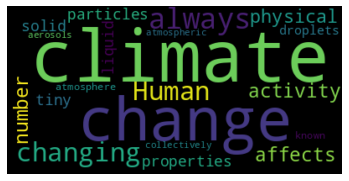

In [171]:
# here is a sample
text = "climate change. Climate is always changing. Human activity also affects climate through changes in the number and physical properties of tiny solid particles and liquid droplets in the atmosphere, known collectively as atmospheric aerosols"
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


plt.show()

As you can see word size is proportional to frequency of a word and highlight the main keywords in a text.
This gives an idea about the content of the  text.

We can do all the text pre processing or wrangling
 like 

- More Cleaning
- Case conversion
- Spell correction
- Expanding contractions
- Removing stop words
- Morphological normalization
    - Stemming
    - Lemmatization


But for this homework we'll only **do expanding contractions,  stop words removal,  and lemmatization**

# Q 9 (2 = .5+.5+.5+.5 points) Do
- expanding contractions
- stop words removal
- lemmatization
- Use wordcloud to visualize keywords

In [172]:
!pip install contractions

In [173]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import contractions
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /home/djones/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/djones/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


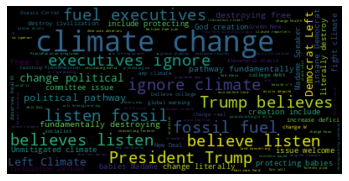

In [138]:
text = """

"""
for i in range(len( climate_feed_df)):
    text += climate_feed_df['final_tweet_text'][i]

text_tokens = word_tokenize(text)
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]
text_without_sw = (" ").join(tokens_without_sw)

expanded_words = []   
for word in text_without_sw.split():
  # using contractions.fix to expand the shortened words
  expanded_words.append(contractions.fix(word)) 

lemmed = []    
lemmatizer = WordNetLemmatizer()

for lem in expanded_words: 
    lemmed.append(lemmatizer.lemmatize(word))

full_text = ' '.join(lemmed)
    
wordcloud = WordCloud().generate(complete_text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


plt.show()

# Homework ends
# Final thoughts
We did not do all of the cleanup or used all attributes for EDA. Let us highlight one more cleanup activity related to language.

In [2]:
import enchant

ModuleNotFoundError: No module named 'enchant'

In [73]:
dictionary = enchant.Dict('en')

In [70]:
climate_feed_df['text'].loc[5217]

'去LACMA那么多次，都没意识到旁边的Tar Pits是啥…\n一直以为是摆几个造型给小朋友们玩的公园…\n站在千年前的point看千年后的楼宇车辆，再一想climate change，千年后人类可能也不存在了就觉得——有点兴奋'

In [74]:
[dictionary.check(w) for w in  nltk.word_tokenize(climate_feed_df['text'].loc[5217])]

[False, False, False, False, False]